In [1]:
import plotly, logging, pandas
import plotly.express as px
logger = logging.getLogger()
# Setting the threshold of logger to DEBUG
#logger.setLevel(logging.INFO)
logger.setLevel(logging.DEBUG)

import plotly.graph_objects as go

from plotly.graph_objects import Layout
plotly.__version__


'5.14.1'

In [2]:
# helper functions
def improve_text_position(x):
    """ it is more efficient if the x values are sorted """
    # fix indentation 
    #positions = ['top right', 'bottom right']  # you can add more: left center ...
    positions = ['top right','middle right','bottom right']  # you can add more: left center ...
    positions = ['bottom center']  # you can add more: left center ...
    positions = ['middle right']  # you can add more: left center ...
    positions = ['top center']  # you can add more: left center ...

    positions = ['middle right',
                 'middle right',
                 'middle right',
                'middle right',
                 'middle left',
                ]  # you can add more: left center ...

    positions = ['bottom center']  # you can add more: left center ...
    
    return [positions[i % len(positions)] for i in range(len(x))]

def show_scatters(data,No_text=False):
    if(No_text==True):
        text=None
    else:
        text="Method"
    fig = px.scatter(data, x="Test_cost", y="Test_acc", text=text, color="Provider",
                     size_max=60,width=600, height=500,
                    symbol_sequence= ['circle', 'square', 'diamond','star','bowtie'],
                     symbol="Marker",
                     color_discrete_sequence = px.colors.qualitative.T10,
)

    #fig.update_traces(textfont=dict(color=data['Provider'].map(lambda x: px.colors.qualitative.T10[data['Provider'].unique().tolist().index(x)])))

    fig.update_traces(textposition=improve_text_position(data['Test_cost']))

    fig.update_layout(
        margin=dict(l=0,r=0,b=0,t=0),
        xaxis_title="Cost",
    yaxis_title="Accuracy",
        font=dict(
        family="Arial Black",
        size=18,

#        color="RebeccaPurple"
    )
#        font_family="Times New Roman"

    )
    
    fig.update_traces(marker=dict(size=10,
                              ),
                     )
                      
    return fig

def add_lines(fig,data,name="FrugalGPT",marker_color="orange",line_color="red"):        
    fig.add_trace(
        go.Scatter(
            name=name,
            x=data["Test_budget"],
            y=data['Test_acc'],
        mode="lines+markers",
             marker=dict(size=15
                         ,color=marker_color),
            
        line=go.scatter.Line(color=line_color,width=5),
        showlegend=True),
        
)
    return fig
   

def add_scatters(fig,data,name="Test"):
    trace2= px.scatter(x=data["Test_cost"],
            y=data['Test_acc'],
            text=data["Method"],
            title="first trace",
            marker=dict(color='red'),           
                      )

    fig.add_trace(trace2.data[0])
    return fig

def show_legend(fig,names=[]):
    labels_to_show_in_legend = names

    for trace in fig['data']: 
        logging.debug("trace is {}".format(trace))
        if (not trace['name'] in labels_to_show_in_legend):
            trace['showlegend'] = False
        
    fig.update_layout(legend=dict(
    yanchor="top",
    y=0.15,
    xanchor="center",
    x=0.7
),
    legend_title="",
                     )
    fig.update_layout(legend_traceorder="reversed")
    return fig

def update_format(fig,xrange=None,yrange=None):
    layout = Layout(plot_bgcolor='rgba(0,0,0,0)')

    
    fig.update_layout(
        margin=dict(l=0,r=0,b=0,t=0),
        xaxis_title="Cost ($)",
    yaxis_title="Accuracy",
        font=dict(
        family="Arial",
        size=25,
        #color='rgba(0,0,0,0)',

#        color="RebeccaPurple"
    )
#        font_family="Times New Roman"

    )
    fig.update_layout(plot_bgcolor = "white")
    fig.update_xaxes(showline=True, linewidth=2, linecolor='black', gridcolor='lightgrey')
    fig.update_yaxes(showline=True, linewidth=2, linecolor='black', gridcolor='lightgrey')
    fig.update_traces(marker={'size': 15,'opacity':0.7,})
    #fig.update_layout(xaxis_type = "log")
    if(xrange!=None):
        fig.update_xaxes(range=xrange)
    if(yrange!=None):
        fig.update_yaxes(range=yrange)
    return fig

def data_format(datapath="../../summary/headlines_perf_seed_9.csv",
                datapath_FT="../../summary/headlines_perf_seed_9_FT.csv", 
               ):
    d1 = pandas.read_csv(datapath)
    d1['Group'] = 'Plain'
    d2 = pandas.read_csv(datapath_FT)
    d2['Group'] = 'FT'
    frames = [d1, d2]

    result = pandas.concat(frames)
    return result

In [4]:
def show_tradeoffs(datapath="../../summary/headlines_perf_seed_9.csv",
                   datapath_FT="../../summary/headlines_perf_seed_9_FT.csv",                   
                   savepath="../../figures/tradeoffs/OVERRULING.pdf",
                   our_method = "FrugalGPT",
                   SingleLLM = ["CHATGPT","GPT-C","GPT-3","GPT-4","GPT-Neo","GPT-J","GPT-FSQ","CoHere","CoHere-M","J1","J1-G","FT-GPT-C"],
                   FT_LLM=["FT-GPT-C"],
                   LLM_Name_MAP=None,
                   legend=False,
                   yrange=None,
                   xrange=None,
                   No_text=False,
                   width=600,
                   height=600,
                  ):
    # extract data
    data = data_format(datapath=datapath,datapath_FT=datapath_FT) 
    data['Test_budget'] = data['Budget']*data["Test_size"]
    data['Test_cost'] = data['Test_cost']*data["Test_size"]
    logging.debug("data is {}".format(data))
    
    # show base method
    LLMs = data.loc[data['Method'].isin(SingleLLM)]
    if(LLM_Name_MAP!=None):
        LLMs = LLMs.replace(LLM_Name_MAP)
    #LLMs = LLMs.loc[LLMs['Group']=='FT']
    logging.debug("base API is {}".format(LLMs))
    fig = show_scatters(LLMs,No_text=No_text)



    # show FrugalGPT
    FrugalGPT = data.loc[data['Method']==our_method]
    FrugalGPT_Plain = FrugalGPT.loc[FrugalGPT['Group']=="Plain"]
    FrugalGPT_FT = FrugalGPT.loc[FrugalGPT['Group']=="FT"]
    fig = add_lines(fig,FrugalGPT_Plain,name="FrugalGPT",marker_color="red",line_color="red")
    #fig = add_lines(fig,FrugalGPT_FT,name="FrugalGPT",marker_color="red",line_color="red")
     
    if(legend):    
        fig=show_legend(fig,names=['FrugalGPT'])
    else:  
        fig=show_legend(fig,names=[])
        
    fig = update_format(fig,yrange=yrange,xrange=xrange)
    fig.update_layout(legend=dict(x=0.5,y=1.1),
                     width=width,
                     height=height)

    fig.show()
    fig.write_image(savepath)
    return fig


In [9]:
fig = show_tradeoffs(SingleLLM = [
    'Meta-Llama-3-70B-Instruct-Turbo',
    "gpt-4o-mini","gpt-4o-2024-05-13","gpt-4-turbo","gemma-2-9b-it",
     "jamba-1.5-large",
        "gemini-1.5-pro","gemini-1.5-flash-8b","gemini-1.5-flash",
                                  'claude-3-5-sonnet-20240620',
    "CHATGPT","GPT-C","GPT-3","GPT-4","GPT-Neo","GPT-J","GPT-FSQ","CoHere","J1","J1-G","J1-L","FA-Q"],
              savepath="../../figures/HEADLINES_2024updatemodel.pdf",
               datapath="../../summary/summary_HEADLINES_e8_full_2024.csv",
            datapath_FT='../../summary/summary_HEADLINES_e8_full_2024.csv',
               legend=True,
              LLM_Name_MAP={
                  
                  "Meta-Llama-3-70B-Instruct-Turbo":"Llama 3",
                  "gemma-2-9b-it":"GM2",
                  "gpt-4o-2024-05-13":" GPT-4o", 
                  "gpt-4o-mini":"                                   GPT-4o-mini",
                  "gpt-4-turbo":"GPT-4Turbo",
                  "jamba-1.5-large":"Jamba 1.5",
                  "gemini-1.5-pro":"                              Gemini Pro",
                  "gemini-1.5-flash-8b":"    Gem 8B",
                  "gemini-1.5-flash":"Gem F",
                  'claude-3-5-sonnet-20240620':"            Claude 3.5",
                  
                  "GPT-FSQ":"FSQ","GPT-C":"GPT-C","CoHere":" CoHere","CoHere-M":"C-M","FA-Q":"FQ","FA-C":"FC","FT-C":"FT","CHATGPT":"ChatGPT","J1":"   J1"},
              
               yrange=[0.8,0.885],
                     width=500*1.1,
                   height=500*1.1,
              )



DEBUG:root:data is     Unnamed: 0  Test_acc  Test_cost  Test_size  Train_acc  Train_cost  \
0            0    0.8500   0.074466       5000     0.8648    0.000017   
1            1    0.8698   0.960610       5000     0.8802    0.000224   
2            2    0.8740   1.918150       5000     0.8866    0.000428   
3            3    0.8740   2.763315       5000     0.8882    0.000582   
4            4    0.8740   2.763315       5000     0.8882    0.000582   
5            5    0.8740   4.988335       5000     0.8884    0.001015   
6            6    0.8740   4.988335       5000     0.8884    0.001015   
7            7    0.8746   6.794050       5000     0.8894    0.001390   
8            8    0.8746   6.794050       5000     0.8894    0.001390   
9            9    0.8746   6.794050       5000     0.8894    0.001390   
10          10    0.8746   6.794050       5000     0.8894    0.001390   
11          11    0.8746   6.794050       5000     0.8894    0.001390   
12          12    0.8746   6.794

DEBUG:root:base API is     Unnamed: 0  Test_acc  Test_cost  Test_size  Train_acc  Train_cost  \
20           0    0.8142   2.594070       5000     0.8146    0.000519   
21           1    0.8264   1.003510       5000     0.8290    0.000201   
22           2    0.8320   0.352027       5000     0.8336    0.000070   
23           3    0.8480   0.086461       5000     0.8442    0.000017   
24           4    0.8250   1.450085       5000     0.8234    0.000290   
25           5    0.8422   0.043400       5000     0.8462    0.000009   
26           6    0.8332   5.499990       5000     0.8318    0.001100   
27           7    0.8478   0.165673       5000     0.8506    0.000033   
28           8    0.8558  16.652775       5000     0.8616    0.003331   
29           9    0.8422   4.036410       5000     0.8432    0.000807   
20           0    0.8142   2.594070       5000     0.8146    0.000519   
21           1    0.8264   1.003510       5000     0.8290    0.000201   
22           2    0.8320   0

DEBUG:root:trace is Scatter({
    'hovertemplate': ('Provider=google<br>Marker=3<br' ... '>Method=%{text}<extra></extra>'),
    'legendgroup': 'google, 3',
    'marker': {'color': '#E45756', 'size': 10, 'symbol': 'diamond'},
    'mode': 'markers+text',
    'name': 'google, 3',
    'orientation': 'v',
    'showlegend': True,
    'text': array(['    Gem 8B', '    Gem 8B'], dtype=object),
    'textposition': [bottom center, bottom center, bottom center, bottom center,
                     bottom center, bottom center, bottom center, bottom center,
                     bottom center, bottom center, bottom center, bottom center,
                     bottom center, bottom center, bottom center, bottom center,
                     bottom center, bottom center, bottom center, bottom center],
    'x': array([0.04339987, 0.04339987]),
    'xaxis': 'x',
    'y': array([0.8422, 0.8422]),
    'yaxis': 'y'
})
DEBUG:root:trace is Scatter({
    'hovertemplate': ('Provider=openaichat<br>Marker=' ... '>

In [10]:
show_tradeoffs(SingleLLM = [
 'Meta-Llama-3-70B-Instruct-Turbo',
    "gpt-4o-mini","gpt-4o-2024-05-13","gpt-4-turbo","gemma-2-9b-it",
     "jamba-1.5-large",
        "gemini-1.5-pro","gemini-1.5-flash-8b","gemini-1.5-flash",
                                  'claude-3-5-sonnet-20240620',
    
    "CHATGPT","GPT-C","GPT-3","GPT-4","GPT-Neo","GPT-J","GPT-FSQ","CoHere","J1","J1-G","J1-L","FA-Q"],
              savepath="../../figures/SCIQ_2024updatemodel.pdf",
               datapath="../../summary/summary_SCIQ_e8_full_2024.csv",
            datapath_FT='../../summary/summary_SCIQ_e8_full_2024.csv',
               legend=True,
              LLM_Name_MAP={
                  "Meta-Llama-3-70B-Instruct-Turbo":"Llama 3",
                  "gemma-2-9b-it":"GM2",
                  "gpt-4o-2024-05-13":" GPT-4o", 
                  "gpt-4o-mini":"                                GPT-4o-mini",
                  "gpt-4-turbo":"GPT-4Turbo",
                  "jamba-1.5-large":"                 Jamba 1.5",
                  "gemini-1.5-pro":"                              Gemini Pro",
                  "gemini-1.5-flash-8b":"    Gem 8B",
                  "gemini-1.5-flash":"Gem F",
                  'claude-3-5-sonnet-20240620':"          Claude 3.5",

                  
                  "GPT-FSQ":"FSQ","GPT-C":"GPT-C","CoHere":" CoHere","CoHere-M":"C-M","FA-Q":"FQ","FA-C":"FC","FT-C":"FT","CHATGPT":"ChatGPT","J1":"   J1"},
              yrange=[0.7,0.802],
                     width=500*1.1,
                   height=500*1.1,
              )

DEBUG:root:data is     Unnamed: 0  Test_acc  Test_cost  Test_size  Train_acc  Train_cost  \
0            0  0.756000   0.494114       5839   0.718397    0.000084   
1            1  0.769652   4.612308       5839   0.778006    0.000828   
2            2  0.786950  11.003922       5839   0.787427    0.001945   
3            3  0.788149  16.358280       5839   0.790682    0.002861   
4            4  0.788491  18.342436       5839   0.791881    0.003193   
5            5  0.788491  18.342436       5839   0.791881    0.003193   
6            6  0.788491  18.342436       5839   0.791881    0.003193   
7            7  0.788491  18.342436       5839   0.791881    0.003193   
8            8  0.788491  18.342436       5839   0.791881    0.003193   
9            9  0.788491  18.342436       5839   0.791881    0.003193   
10          10  0.788491  18.342436       5839   0.791881    0.003193   
11          11  0.788491  18.342436       5839   0.791881    0.003193   
12          12  0.788491  18.342

DEBUG:root:base API is     Unnamed: 0  Test_acc  Test_cost  Test_size  Train_acc  Train_cost  \
20           0  0.730262  13.319892       5839   0.715142    0.002285   
21           1  0.241137   5.602053       5839   0.239466    0.000960   
22           2  0.753554   1.859412       5839   0.750257    0.000319   
23           3  0.730262   0.465482       5839   0.713772    0.000080   
24           4  0.539818   7.810188       5839   0.534601    0.001340   
25           5  0.436205   0.233658       5839   0.430284    0.000040   
26           6  0.774790  31.561412       5839   0.771840    0.005410   
27           7  0.755780   0.949357       5839   0.739979    0.000163   
28           8  0.778558  94.991565       5839   0.764303    0.016284   
29           9  0.721356  21.313366       5839   0.720281    0.003654   
20           0  0.730262  13.319892       5839   0.715142    0.002285   
21           1  0.241137   5.602053       5839   0.239466    0.000960   
22           2  0.753554   1

DEBUG:root:trace is Scatter({
    'hovertemplate': ('Provider=google<br>Marker=3<br' ... '>Method=%{text}<extra></extra>'),
    'legendgroup': 'google, 3',
    'marker': {'color': '#E45756', 'size': 10, 'symbol': 'diamond'},
    'mode': 'markers+text',
    'name': 'google, 3',
    'orientation': 'v',
    'showlegend': True,
    'text': array(['    Gem 8B', '    Gem 8B'], dtype=object),
    'textposition': [bottom center, bottom center, bottom center, bottom center,
                     bottom center, bottom center, bottom center, bottom center,
                     bottom center, bottom center, bottom center, bottom center,
                     bottom center, bottom center, bottom center, bottom center,
                     bottom center, bottom center, bottom center, bottom center],
    'x': array([0.23365774, 0.23365774]),
    'xaxis': 'x',
    'y': array([0.43620483, 0.43620483]),
    'yaxis': 'y'
})
DEBUG:root:trace is Scatter({
    'hovertemplate': ('Provider=openaichat<br>Marker=

DEBUG:root:data is     Unnamed: 0  Test_acc  Test_cost  Test_size  Train_acc  Train_cost  \
0            0  0.760185   0.013449       1080   0.764815    0.000013   
1            1  0.962963   0.118841       1080   0.960185    0.000111   
2            2  0.962963   0.376589       1080   0.960185    0.000327   
3            3  0.962963   0.376589       1080   0.960185    0.000327   
4            4  0.962963   0.376589       1080   0.960185    0.000327   
5            5  0.962963   0.376589       1080   0.960185    0.000327   
6            6  0.962963   0.376589       1080   0.960185    0.000327   
7            7  0.962963   0.376589       1080   0.960185    0.000327   
8            8  0.962963   0.376589       1080   0.960185    0.000327   
9            9  0.962963   0.376589       1080   0.960185    0.000327   
10          10  0.962963   0.376589       1080   0.960185    0.000327   
11          11  0.962963   0.376589       1080   0.960185    0.000327   
12          12  0.962963   0.376

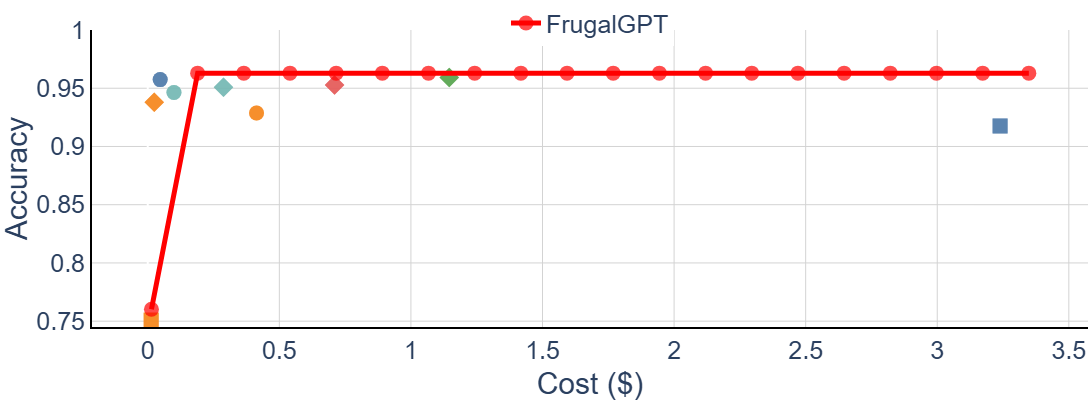

In [6]:
fig = show_tradeoffs(SingleLLM = ['Meta-Llama-3-70B-Instruct-Turbo',
    "gpt-4o-mini","gpt-4o","gpt-4-turbo","gemma-2-9b-it",
     "jamba-1.5-large",
        "gemini-1.5-pro","gemini-1.5-flash-8b","gemini-1.5-flash",
                                  'claude-3-5-sonnet-20240620',
                            
                                  "CHATGPT","GPT-C","GPT-3","GPT-4","GPT-Neo","GPT-J","GPT-FSQ","CoHere","J1","J1-G","J1-L","FA-Q"],
              savepath="../../figures/OVERRULING_202411.pdf",
               datapath="../../summary/summary_OVERRULING_e8_full_2024.csv",
            datapath_FT='../../summary/summary_OVERRULING_e8_full_2024.csv',
               legend=True,
              LLM_Name_MAP={
                  "Meta-Llama-3-70B-Instruct-Turbo":"              Llama 3 (70B)",
                  "gemma-2-9b-it":"      GM2 (9B)",
                  "gpt-4o":"             GPT-4o", 
                  "gpt-4o-mini":"            GPT-4o-mini",
                  "gpt-4-turbo":"GPT-4Turbo",
                  "GPT-FSQ":"FSQ","GPT-C":"GPT-C","CoHere":" CoHere","CoHere-M":"C-M","FA-Q":"FQ","FA-C":"FC","FT-C":"FT","CHATGPT":"ChatGPT","J1":"   J1"},
              yrange=[0.745,1.0],
                     width=500,
                   height=400,
                     No_text=True,

              )
